# importing all libraries

In [2]:
import os
import re
import sys
import nltk
import itertools
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from joblib import dump, load
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Reading the Dataset

In [3]:
df = pd.read_csv('./Resume.csv')
df.drop(df.columns[[0, 2]], axis=1, inplace=True)
df = df[['Category', 'Resume_str']]
df.columns = ['Category', 'Resume']


df.head()

Category                                             Resume
0       HR           HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1       HR           HR SPECIALIST, US HR OPERATIONS      ...
2       HR           HR DIRECTOR       Summary      Over 2...
3       HR           HR SPECIALIST       Summary    Dedica...
4       HR           HR MANAGER         Skill Highlights  ...

# List of all Categories

In [4]:
index = 0
for i in range(len(df['Category'].unique())):
    print(df['Category'].unique()[i])
    index += 1
print("Total Categories: ", index)

HR
DESIGNER
INFORMATION-TECHNOLOGY
TEACHER
ADVOCATE
BUSINESS-DEVELOPMENT
HEALTHCARE
FITNESS
AGRICULTURE
BPO
SALES
CONSULTANT
DIGITAL-MEDIA
AUTOMOBILE
CHEF
FINANCE
APPAREL
ENGINEERING
ACCOUNTANT
CONSTRUCTION
PUBLIC-RELATIONS
BANKING
ARTS
AVIATION
Total Categories:  24


# Visualizing most commonly used words in each type of Resumes

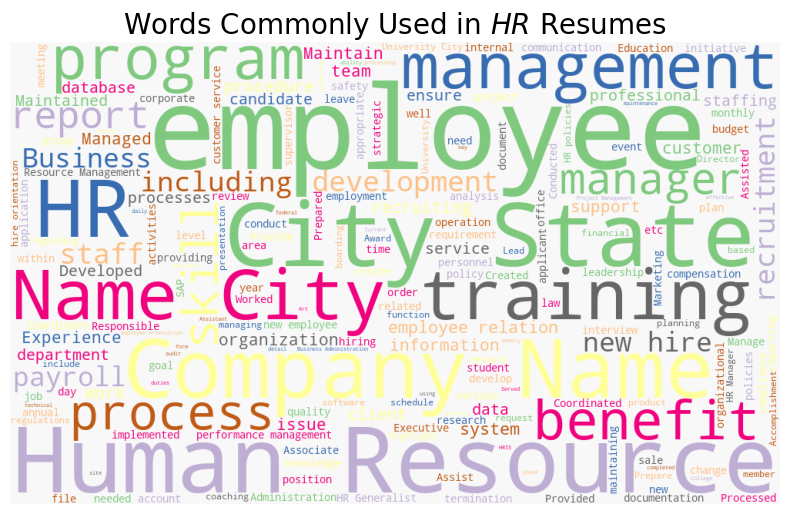

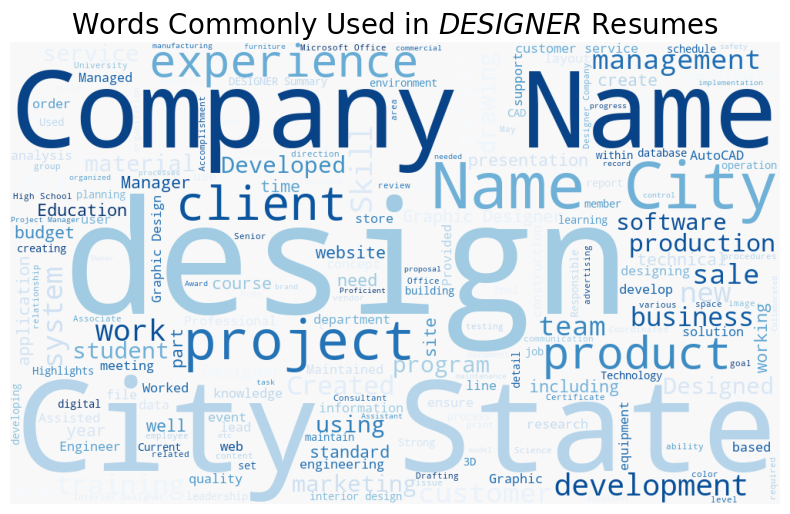

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [6]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
for label, cmap in zip(df['Category'].unique(), a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

# Pre Processing

# Checking for missing data

In [ ]:
print(df.isnull().sum())

Category    0
Resume      0
dtype: int64


Converting the data into lower case and removing words with small lengths

In [9]:
df['Resume'] = df['Resume'].apply(lambda x:x.lower())
for i in range(len(df)):
    lw=[]
    for j in df['Resume'][i].split():
        if len(j)>=3:                  
            lw.append(j)
    df['Resume'][i]=" ".join(lw)

C:\Users\Yordanos\AppData\Local\Temp\ipykernel_5216\4277992297.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Resume'][i]=" ".join(lw)
C:\Users\Yordanos\AppData\Local\Temp\ipykernel_5216\4277992297.py:7: FutureWarning: ChainedAssign

# Removing punctuations

In [10]:
ps = list(";?.:!,")
df['Resume'] = df['Resume']

for p in ps:   
    df['Resume'] = df['Resume'].str.replace(p, '')

Removing '\n' and '\t', extra spaces, quoting text and progressive pronouns

In [11]:
df['Resume'] = df['Resume'].str.replace("    ", " ")
df['Resume'] = df['Resume'].str.replace('"', '')
df['Resume'] = df['Resume'].apply(lambda x: x.replace('\t', ' '))
df['Resume'] = df['Resume'].str.replace("'s", "")
df['Resume'] = df['Resume'].apply(lambda x: x.replace('\n', ' '))

# Downloads necessary resources to apply Lemmatization

In [12]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yordanos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yordanos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yordanos\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Applying Lemmatization on the text data in the Resume column

In [13]:
wl = WordNetLemmatizer()
nr = len(df)
lis = []
for r in range(0, nr):
    ll = []
    t = df.loc[r]['Resume']
    tw = str(t).split(" ")
    for w in tw:
        ll.append(wl.lemmatize(w, pos="v"))
    lt = " ".join(ll)
    lis.append(lt)

In [14]:
df['Resume'] = lis

# Removing Stop-words 

Stopwords are common words (e.g., "the", "is", "and") that are often removed in NLP tasks because they don't contribute much to the meaning of the text

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yordanos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
sw = list(stopwords.words('english'))
for s in sw:
    rs = r"\b" + s + r"\b"
    df['Resume'] = df['Resume'].str.replace(rs, '')

# Visualizing most commonly used words in Resumes after applying NLP techniques 

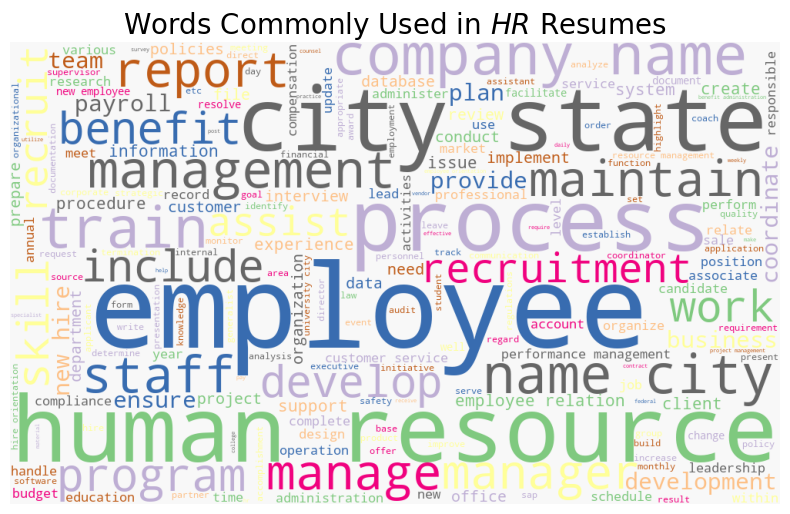

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [17]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r','Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr']
for label, cmap in zip(df['Category'].unique(), a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

In [18]:
df.iloc[1,1]

'specialist operations summary versatile media professional with background communications market human resources and technology experience 09/2015 current specialist operations company name city state manage communication regard launch operations group policy change and system outages design standard work and job aid create comprehensive train program for new employees and contractors audit job postings for old pending on-hold and draft position audit union hourly non-union hourly and salary background check and drug screen conduct monthly new hire benefit brief new employees across all business units serve link between managers and vendors handle question and resolve system-related issue provide real-time process improvement feedback key metrics and initiatives successfully re-branded operations sharepoint site business unit project manager for rfi/rfp background check and drug screen vendor 01/2014 05/2015 it market and communications co-op company name city state post new article c

# Data Preparation for Training and Testing

Encode a categorical column (Category) in a DataFrame (df) into numerical values.

In [19]:
c = LabelEncoder()
df['Category'] = c.fit_transform(df['Category'])
le_name_mapping = dict(zip( c.transform(c.classes_),c.classes_))
print(le_name_mapping)

{np.int64(0): 'ACCOUNTANT', np.int64(1): 'ADVOCATE', np.int64(2): 'AGRICULTURE', np.int64(3): 'APPAREL', np.int64(4): 'ARTS', np.int64(5): 'AUTOMOBILE', np.int64(6): 'AVIATION', np.int64(7): 'BANKING', np.int64(8): 'BPO', np.int64(9): 'BUSINESS-DEVELOPMENT', np.int64(10): 'CHEF', np.int64(11): 'CONSTRUCTION', np.int64(12): 'CONSULTANT', np.int64(13): 'DESIGNER', np.int64(14): 'DIGITAL-MEDIA', np.int64(15): 'ENGINEERING', np.int64(16): 'FINANCE', np.int64(17): 'FITNESS', np.int64(18): 'HEALTHCARE', np.int64(19): 'HR', np.int64(20): 'INFORMATION-TECHNOLOGY', np.int64(21): 'PUBLIC-RELATIONS', np.int64(22): 'SALES', np.int64(23): 'TEACHER'}


# Using TFIDF approach for converting the content in Resumes into vector form

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=20000)
X = cv.fit_transform(df['Resume'])
y = df['Category']

In [21]:
a = cv.get_feature_names_out()

In [22]:
X.shape,y.shape

((2484, 20000), (2484,))

 Handling imbalanced datasets in machine learning, specifically using the SMOTETomek method to resample the data to balance the class distribution.

In [26]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,df['Category'])

In [27]:
X_res.shape,y_res.shape

((2846, 20000), (2846,))

# Splitting the Data using Stratified split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, stratify=y_res, random_state = 42)

In [29]:
X_train.shape,y_train.shape

((2134, 20000), (2134,))

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Greens):
    plt.figure(figsize=(50, 20), dpi=130)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Using KNeighbors Classifier as the Model and printing evaluating it using confusion matrix

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model1=KNeighborsClassifier()
clf1=GridSearchCV(model1,{'n_neighbors':[1,2,3,4,5,6,7,8,9,10]})
clf1.fit(X_res,y_res)
clf1.cv_results_

{'mean_fit_time': array([0.03040977, 0.01721301, 0.02203207, 0.01108971, 0.01844716,
        0.01309395, 0.01714559, 0.0188283 , 0.01920071, 0.01304493]),
 'std_fit_time': array([0.02437265, 0.00096268, 0.0071657 , 0.00592772, 0.00357414,
        0.00476949, 0.00294382, 0.00622729, 0.00383805, 0.00660653]),
 'mean_score_time': array([0.68994126, 0.59709311, 0.72842855, 0.61746445, 0.57348456,
        0.57672477, 0.59507003, 0.64308486, 0.68236394, 0.57034874]),
 'std_score_time': array([0.07388047, 0.02820101, 0.08168037, 0.05156782, 0.04443266,
        0.0437035 , 0.0378742 , 0.08720904, 0.0498085 , 0.02354762]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  

# View the best parameters and score

In [32]:
# View the best parameters and score
print("Best parameters:", clf1.best_params_)
print("Best score:", clf1.best_score_)

Best parameters: {'n_neighbors': 1}
Best score: 0.41778312212869606


**Saves** the cross-validation results of the **KNN model** to a CSV file

In [33]:
pd1=pd.DataFrame(clf1.cv_results_)
pd1.to_csv('Knn.csv')

In [37]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1 = clf1.fit(X_train, y_train)
yp = clf1.predict(X_test)
acc = accuracy_score(y_test, yp)
print("accuracy is: ",acc)


accuracy is:  0.42275280898876405


In [35]:

# Example: Custom CV/resume text
custom_cv = """
First Last
Python Developer
WORK EXPERIENCE
______________________________________________________________________
Resume Worded, London, United Kingdom
VR gaming startup with 50+ employees and $100m+ annual revenue
Python Developer 01/2022 – Present
● Created the back-end financial systems that made 20+ RW applications
user-friendly and seamless to navigate.
● Developed and updated productivity applications, which increased user
downloads by 30% within 96 hours of release.
● Supervised programming tasks and maintained 10+ company websites with
a 50% success rate in product update deployment.
● Designed a marketing lead MySQL database that categorized and filtered
740+ leads from several sources.
Polyhire, London, United Kingdom
NYSE-listed recruitment and employer branding company
Technical Support Specialist 10/2019 – 12/2021
● Responded to and resolved 300+ customer questions about implementing
access software, CMS, IP Cameras, DVRs, and Access Control.
● Provided technical solutions for 70+ Small and Medium-sized enterprises
(SMEs) and 20+ micro-merchants, which accounted for 38% of Polyhire card
payments.
● Discovered a software glitch that prevented 150+ customers from accessing
their accounts in the first week of employment.
● Answered customers' inquiries within 60+ seconds of contact via chat
sessions and live support.
Growthsi, London, United Kingdom & Barcelona, Spain
Career training and membership SaaS with 150,000 users
Junior Software Developer 11/2018 – 09/2019
● Created a user interface as a single-page application using React and MobX;
increased the productivity of 1100+ users by 64%.
● Implemented functionality to support disconnected client machines, which
enabled 420+ customers to work offline without losing data.
● Designed a data dictionary generator that creates documentation for 1200+
developers as spreadsheets and web pages.
● Launched a search engine for consumers to search for ATM locations in 20+
states, saving institutions $50K on data research.
PREVIOUS EXPERIENCE
______________________________________________________________________
Coder, ABC Company, London, UK 06/2017 – 10/2018
Ethical Hacker, XYZ Company, New York, USA 01/2016 – 05/2017
Application Developer, ABC, New York, USA 07/2014 – 12/2015

CONTACT
__________________________
• Bradford, United Kingdom
• +44 1234567890
• first.last@gmail.com
SKILLS
__________________________
Hard Skills:
• Deep Learning
• Data Structures
• Generators
• Iterators
• Multi-Process Architecture
• Object Relational Mapping
Scripting:
• Python
• Shell
• Perl
Source Code Management
Tools:
• GitLab
• Mercurial
• Apache Subversion (SVN)
• CVS
Languages:
• English (Native)
• Romanian (Native)
• Spanish (Conversational)
EDUCATION
__________________________
Associate in Applied
Science
Computer Science
Cultural Studies
New York City, New York
10/2011 - 06/2014
OTHER
___________________________
• Certified Entry-Level Python
Programmer
• Certified Associate in Python
Programming
"""

# Step 1: Vectorize the custom CV text
# Ensure the vectorizer is the same one used during training
# Example: If you used TfidfVectorizer during training, load or reuse it here
#  vectorizer = TfidfVectorizer()  # Replace with your actual vectorizer
X_custom = cv.transform([custom_cv])  # Transform the text into numerical features

# Step 2: Make a prediction
predicted_job = clf1.predict(X_custom)

actual_job_name = le_name_mapping.get(predicted_job[0], "Unknown Job")

# Step 3: Output the predicted job
print("Predicted Job:", actual_job_name)

Predicted Job: BUSINESS-DEVELOPMENT


**Evaluates** the K-Nearest Neighbors (KNN) model on the test dataset and **visualizes** its performance using a confusion matrix

['knei.joblib']

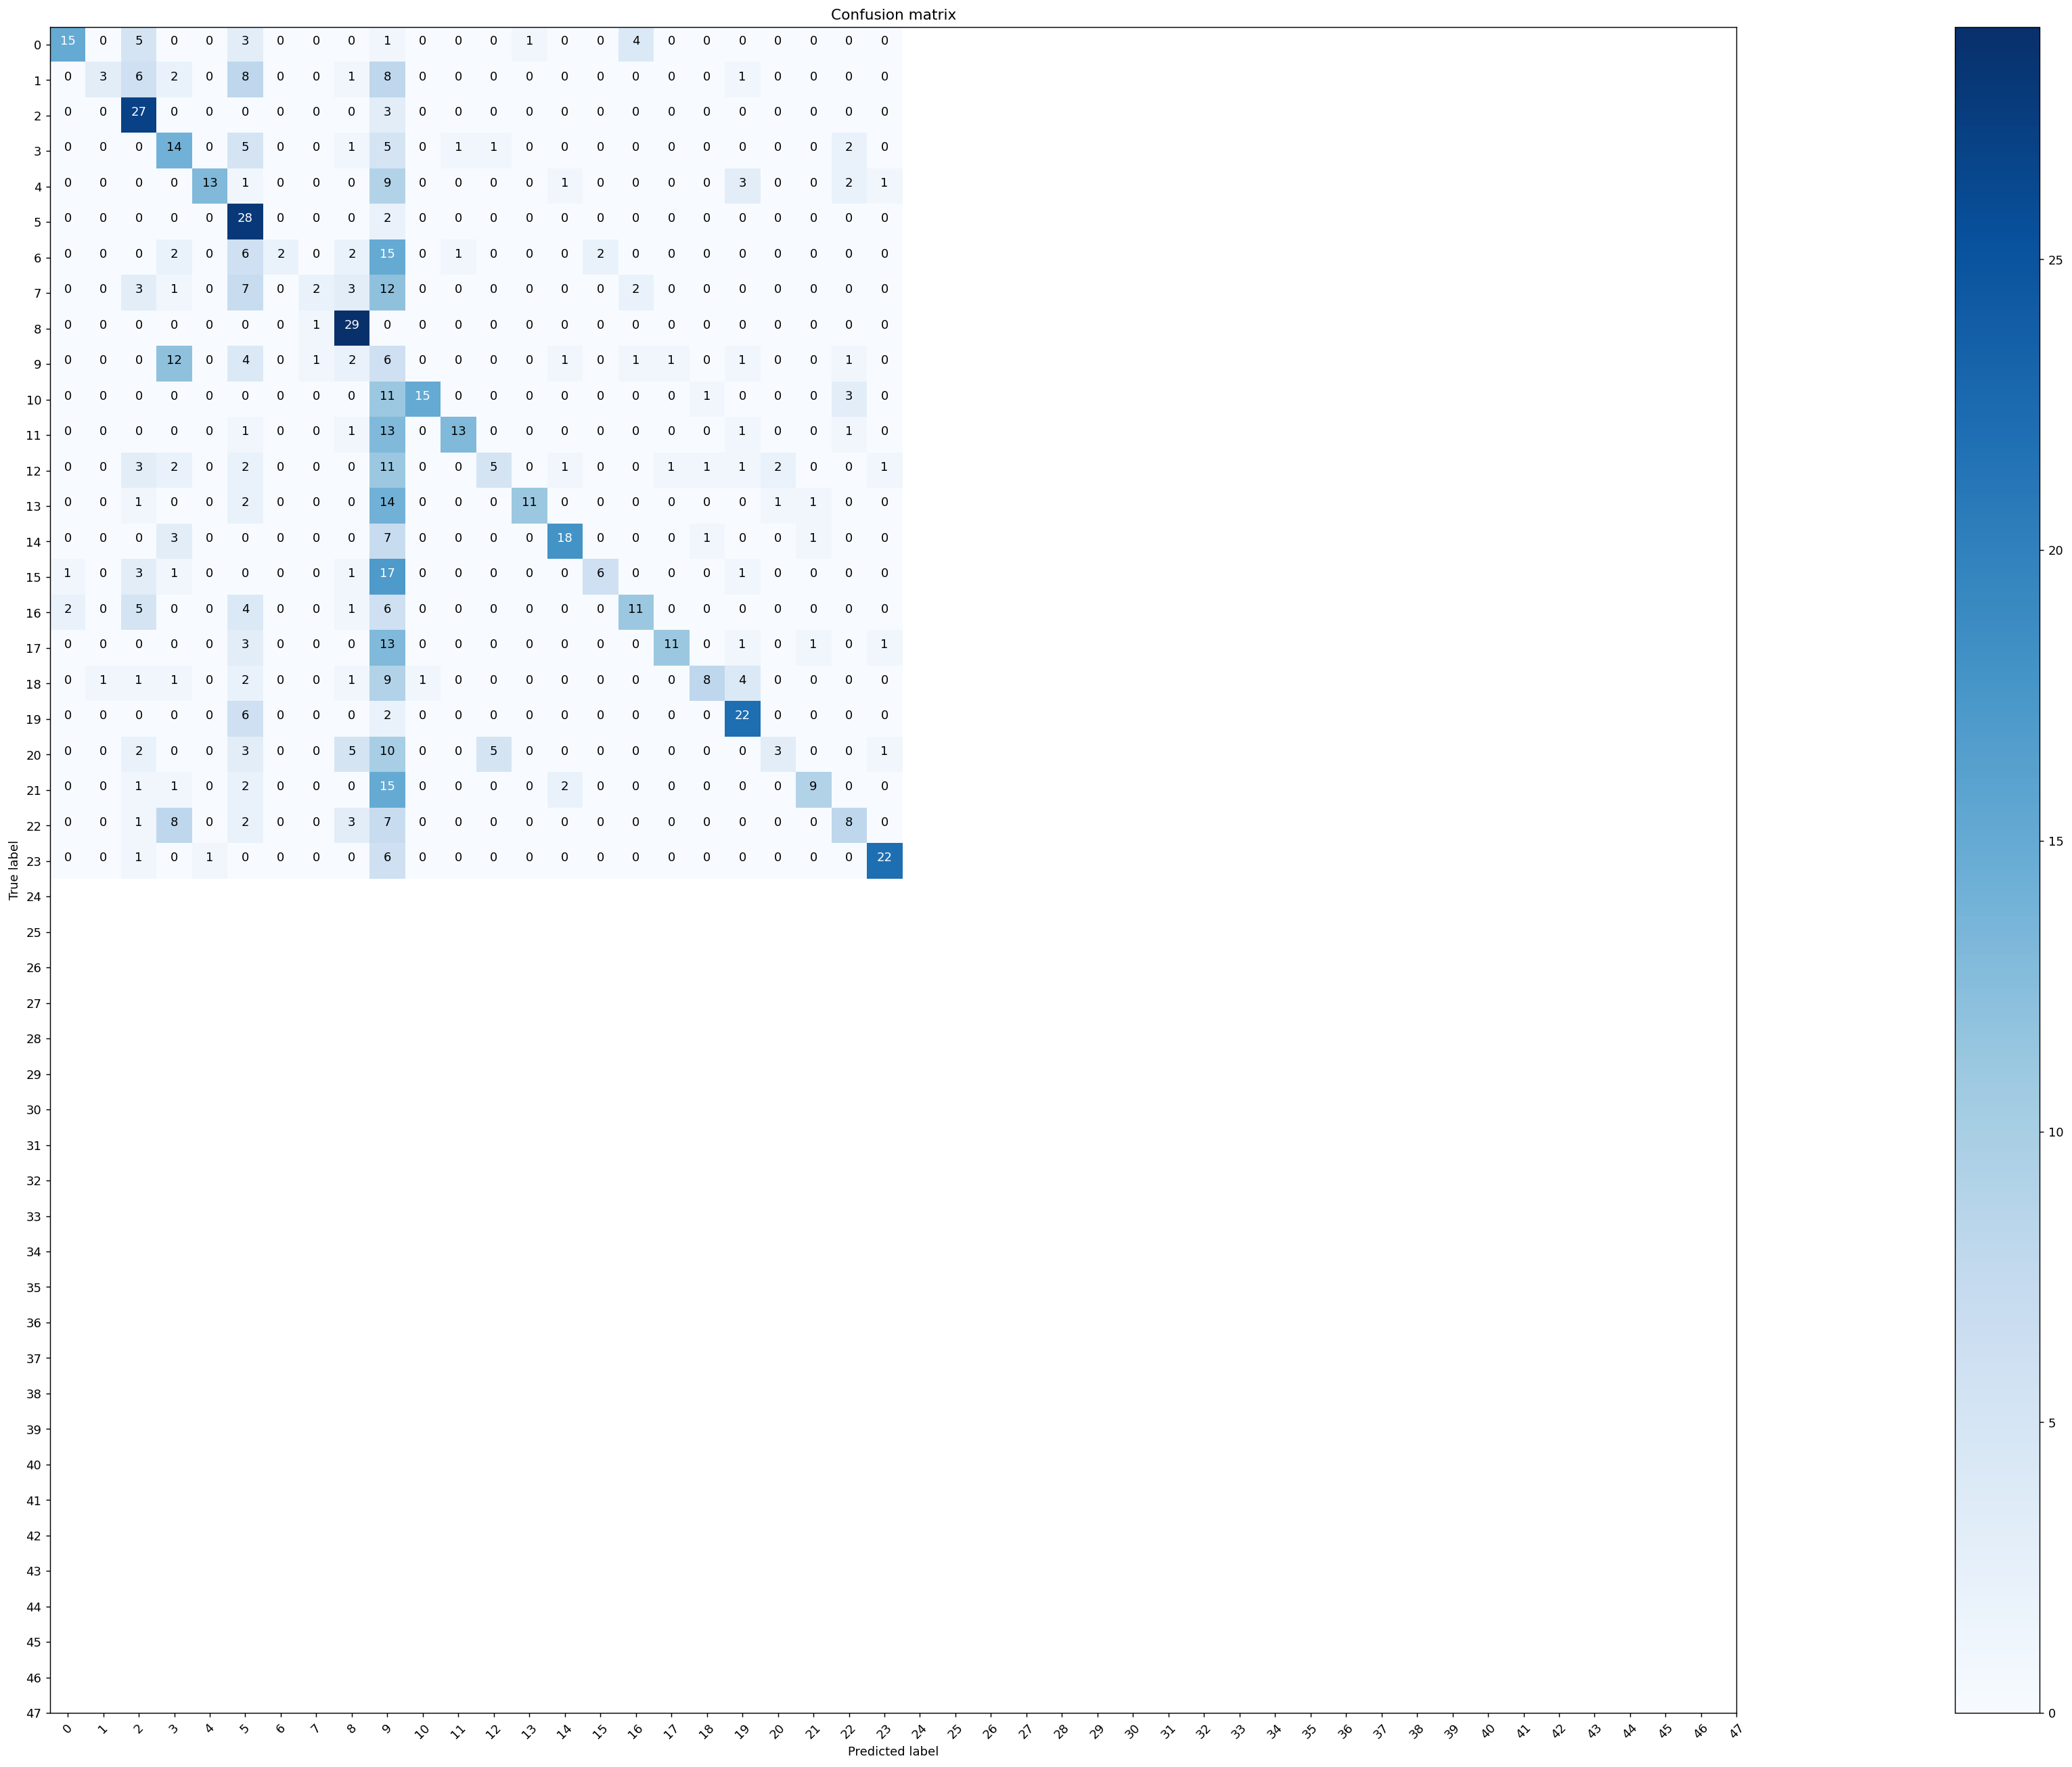

In [36]:
yc = clf1.predict(X_test)
CM = confusion_matrix(y_test, yc)
plot_confusion_matrix(CM, classes = range(48),cmap=plt.cm.Blues)
dump(clf1, 'knei.joblib') 

**Calculates** and returns the **Precision**, **Recall**, **F1-score**, and **Support** for your KNN model on the test dataset.

In [38]:
from sklearn.metrics import precision_recall_fscore_support
s1 = precision_recall_fscore_support(y_test, yc,average='weighted')

precision, recall, f1_score, _ = s1
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")


Precision: 0.66
Recall: 0.42
F1-score: 0.45


# Using Decision tree as the Model and printing evaluating it using confusion matrix

In [39]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
clf2=GridSearchCV(model2,{'max_depth':[10,20,30,40,50,60,70,80,90,100]},cv=5)
clf2.fit(X_res,y_res)
clf2.cv_results_

{'mean_fit_time': array([3.56426411, 6.13626142, 8.16990652, 8.12275844, 8.55744414,
        8.92994022, 8.02984738, 8.14158897, 8.44903765, 9.88698559]),
 'std_fit_time': array([0.23910726, 0.81820022, 0.98501061, 0.74799709, 0.82331341,
        0.61387222, 0.64324964, 1.15924605, 1.05717307, 1.13965709]),
 'mean_score_time': array([0.01397882, 0.01379752, 0.01605234, 0.01249962, 0.01762886,
        0.01989021, 0.0200788 , 0.01477909, 0.01526494, 0.01960893]),
 'std_score_time': array([0.00737781, 0.00427119, 0.00564641, 0.00624981, 0.00316984,
        0.00294558, 0.00621713, 0.00235906, 0.00072955, 0.00686167]),
 'param_max_depth': masked_array(data=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'max_depth': 10},
  {'max_depth': 20},
  {'max_depth': 30},
  {'max_depth': 40},
  {'max_depth': 50},
  {'max_depth': 60},
  {'max_depth': 70},
 

Save Results to a CSV File

In [40]:
pd2=pd.DataFrame(clf2.cv_results_)
pd2.to_csv('DT.csv')

The accuracy of the model on the test

In [41]:
clf2 = tree.DecisionTreeClassifier(max_depth=100)
clf2 = clf2.fit(X_train, y_train)
yp = clf2.predict(X_test)
acc = accuracy_score(y_test, yp)
print("accuracy is: ",acc)

accuracy is:  0.648876404494382


A visual representation of the confusion matrix will be plotted

['DT.joblib']

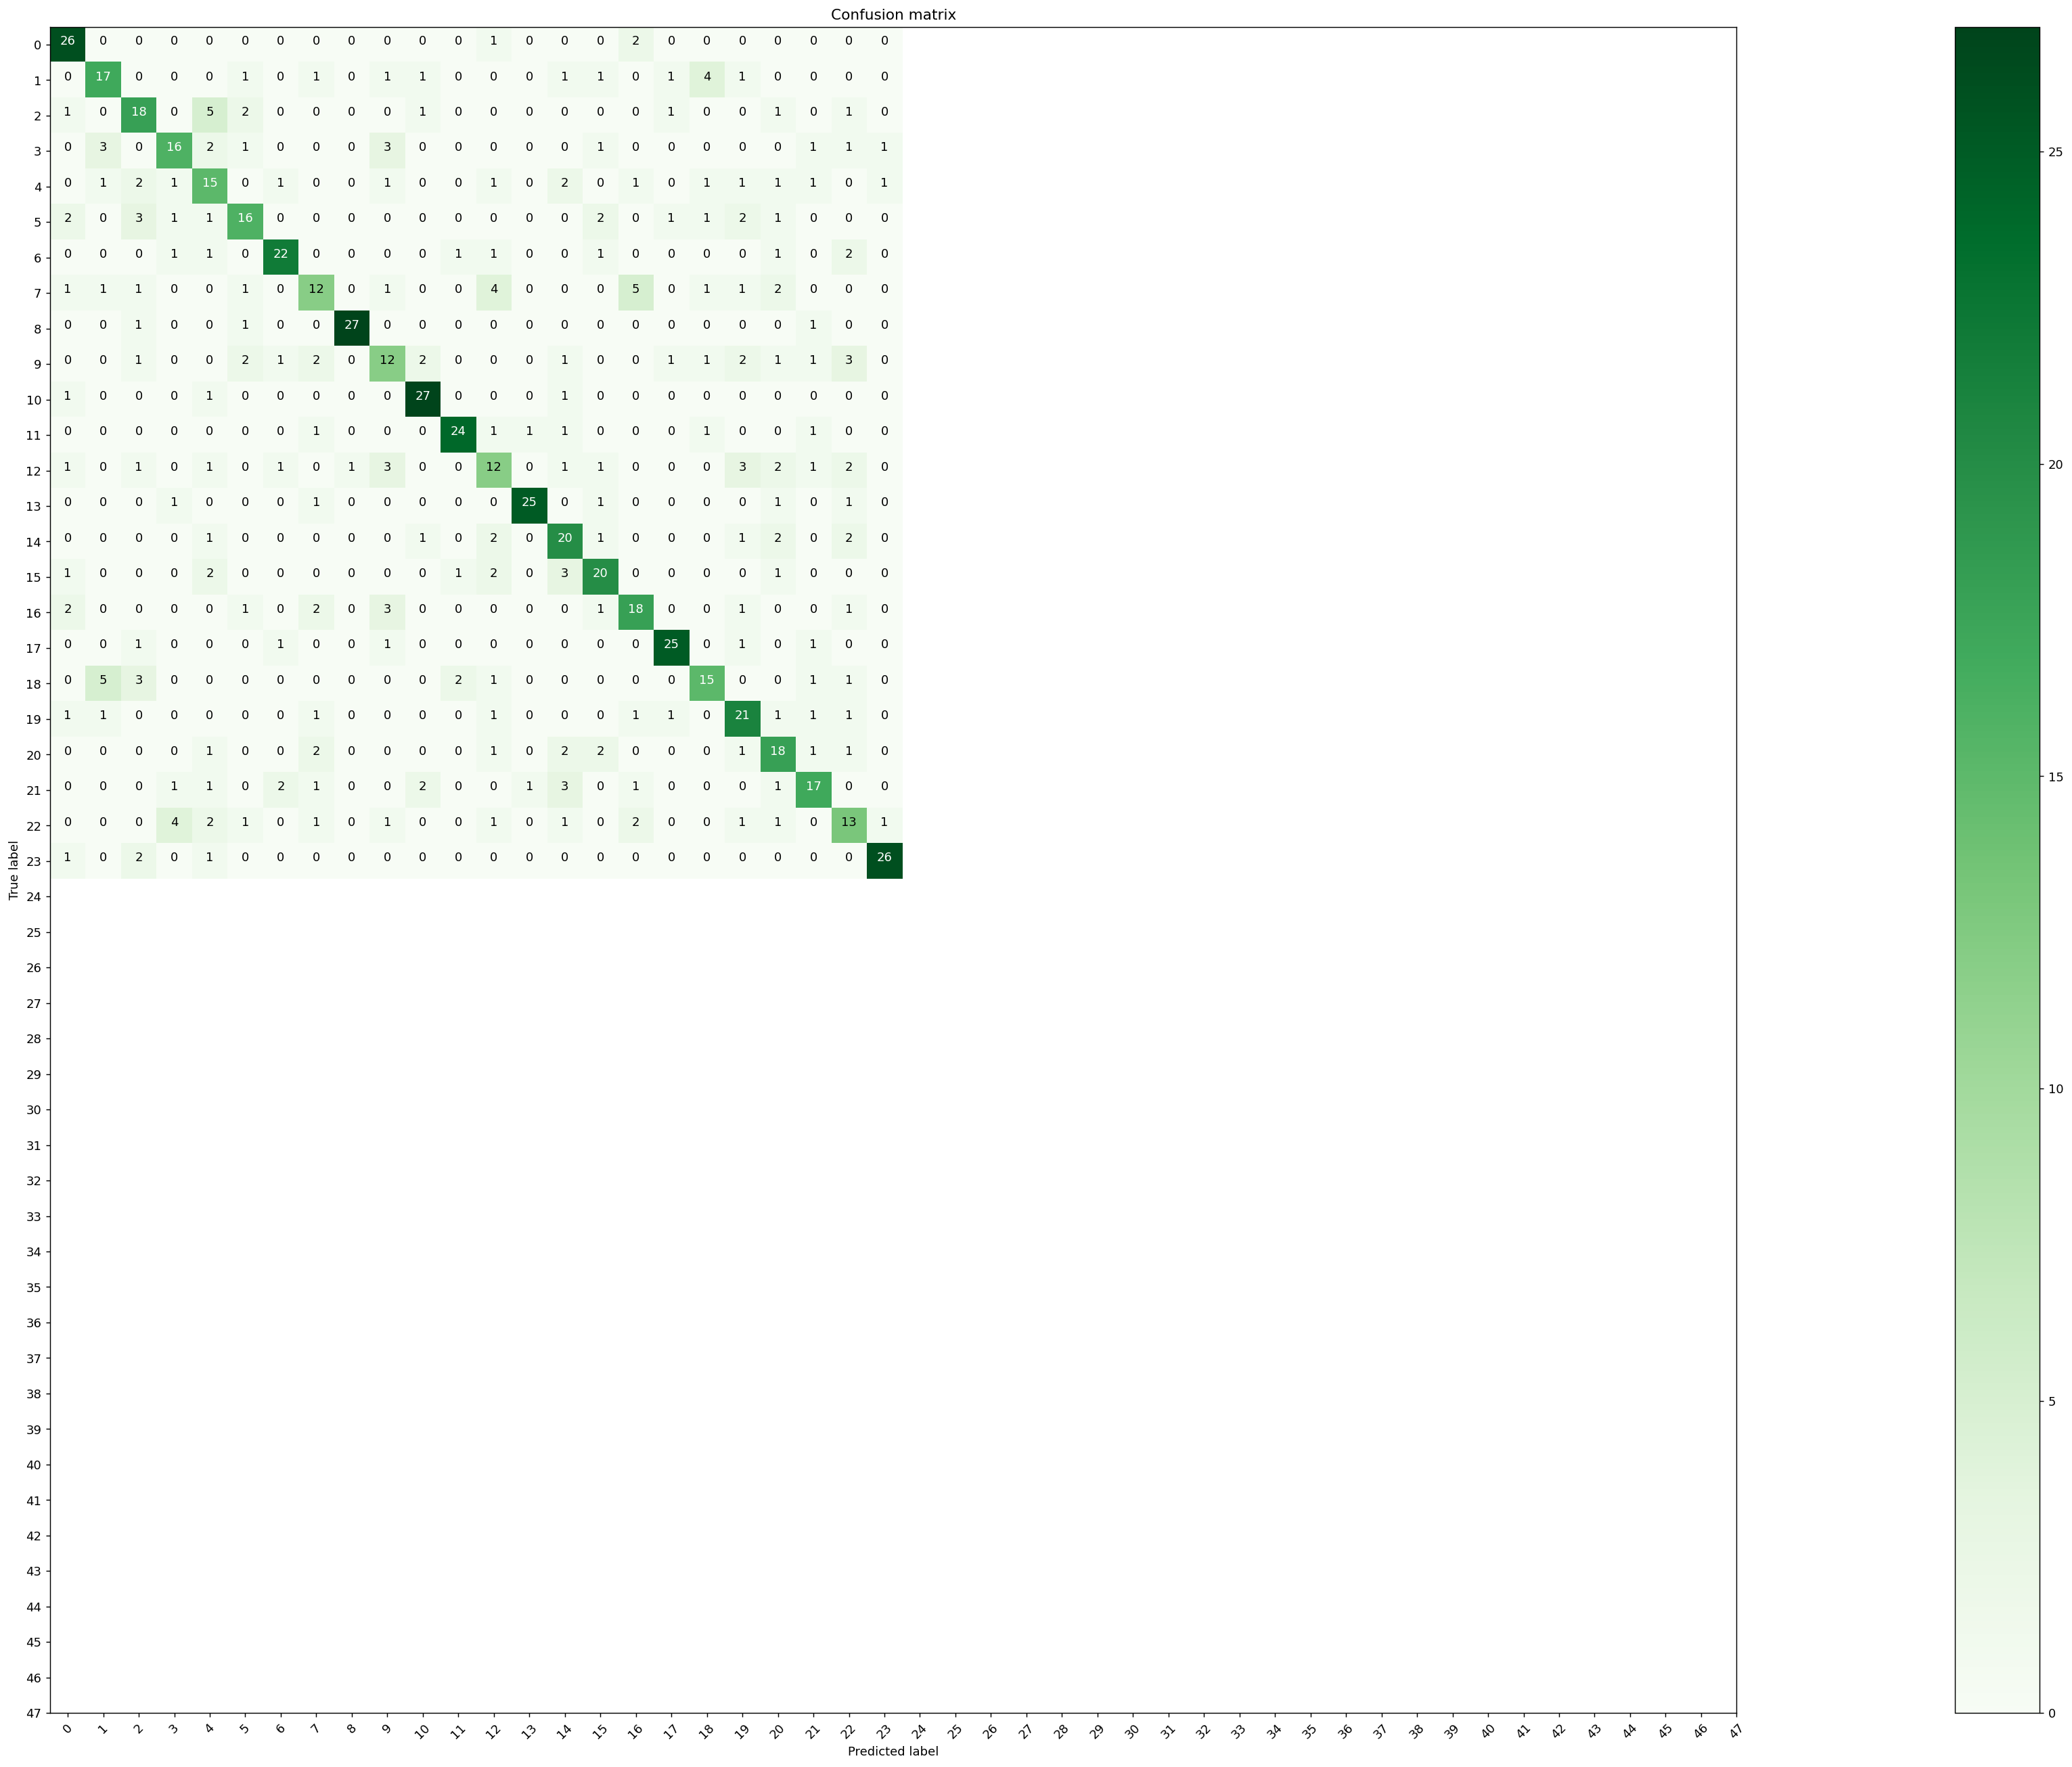

In [42]:
CM = confusion_matrix(y_test, yp)
plot_confusion_matrix(CM, classes = range(48))
dump(clf2, 'DT.joblib') 

In [68]:

# Example: Custom CV/resume text
custom_cv = """
Yordanos Yeshitla
+251-93039-3733 | yordiman614@gmail.com | linkedin.com/in/yordanos-yeshitla | github.com/yordiyes
Education
Haramaya University Haramaya, Ethiopia
BSc in Software Engineering 2021 – 2026
Experience
Web Development Intern July 2024 – August 2024
Prodigy InfoTech Remote
– Designed and developed responsive web applications using HTML, CSS, and JavaScript.
– Collaborated with a team to build dynamic web components.
Web Development Intern June 2024 – July 2024
CodeSoft Remote
– Worked on front-end tasks using HTML, CSS, and React.
– Built reusable UI components and maintained cross-browser compatibility.
Projects
Web Dashboard for Student Projects
Technologies: Node.js, MongoDB, Tailwind CSS
Chat App
Technologies: React, Node.js, MongoDB
Spam Email Detection Model
Technologies: Machine Learning, Python
E-learning Site Projects
Technologies: Node.js, Express, MongoDB, Tailwind CSS (In Progress)
Task-Management Site
Technologies: Node.js, MongoDB, Tailwind CSS (In Progress)
Typing Test Website
Technologies: HTML, CSS, JavaScript (In Progress)
Technical Skills
Programming Languages: Python, JavaScript, Java, C++
Web Development: HTML, CSS, Tailwind CSS, React, Node.js, Express.js, Vite
Databases: PostgreSQL, MongoDB
Tools: Git
Certifications
HTML, CSS, and JavaScript for Web Developers (Coursera – John Hopkins University)
Introduction to Back-End Development (Coursera)
Programming with JavaScript (Coursera)
Java Programming for Beginners (SimpliLearn)
PostgreSQL : Become an SQL Developer (SimpliLearn)
SQL Intermediate (SoloLearn)
Reference
Nathnael Teketel +251-996904151
Addis Ababa
"""

# Step 1: Vectorize the custom CV text
# Ensure the vectorizer is the same one used during training
# Example: If you used TfidfVectorizer during training, load or reuse it here
#  vectorizer = TfidfVectorizer()  # Replace with your actual vectorizer
X_custom = cv.transform([custom_cv])  # Transform the text into numerical features

# Step 2: Make a prediction
predicted_job = clf1.predict(X_custom)

actual_job_name = le_name_mapping.get(predicted_job[0], "Unknown Job")

# Step 3: Output the predicted job
print("Predicted Job:", actual_job_name)

Predicted Job: DotNet Developer


In [43]:
yp2 = clf2.predict(X_res)

In [44]:
from sklearn.metrics import precision_recall_fscore_support
s2 = precision_recall_fscore_support(y_res, yp2,average='weighted')
print("Weighted Precision:", s2[0])
print("Weighted Recall:", s2[1])
print("Weighted F1 Score:", s2[2])


Weighted Precision: 0.9125862316323118
Weighted Recall: 0.9121574139142656
Weighted F1 Score: 0.9121468725519843


# Using Random Forest Classifier as the Model and printing evaluating it using confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
clf3=GridSearchCV(model3,{'n_estimators':[10,50,100,300,500]},cv=5)
clf3.fit(X_res,y_res)

In [ ]:
clf3.best_estimator_

In [77]:
pd3=pd.DataFrame(clf3.cv_results_)
pd3.to_csv('RF.csv')

In [ ]:
clf4=RandomForestClassifier(n_estimators = 500)
clf4 = clf4.fit(X_train, y_train)
yp = clf4.predict(X_test)
acc = accuracy_score(y_test, yp)
print("accuracy is: ",acc)
dump(clf4, 'RF.joblib') 

In [ ]:
yp4 = clf4.predict(X_res)
CM = confusion_matrix(y_res, yp4)
plot_confusion_matrix(CM, classes = range(48))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
s3 = precision_recall_fscore_support(y_res, yp4,average='weighted')
s3